## Exercise 2
### 2025-11-10
Linear models

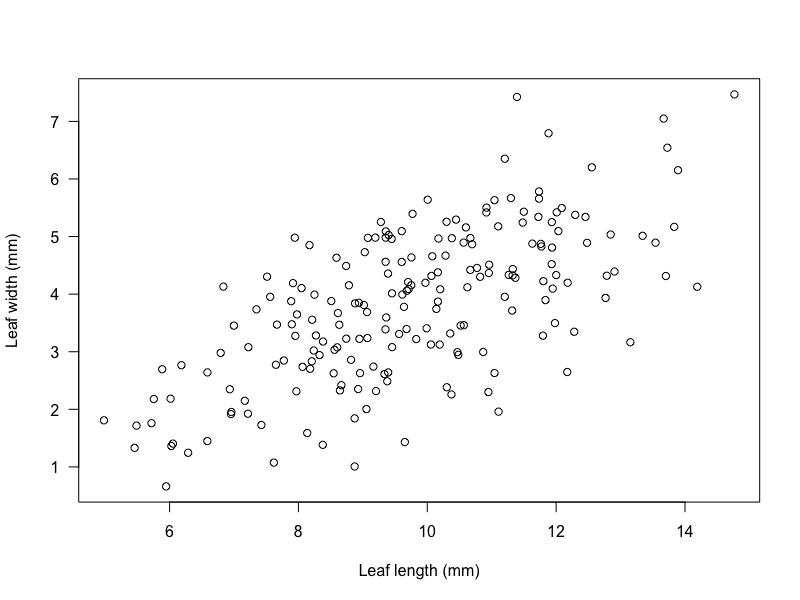

In [ ]:
set.seed(85)
x <- rnorm(n=200, mean=10, sd=2)
y <- 0.4*x + rnorm(200, 0, 1)
plot(x, y, las=1, xlab="Leaf length (mm)", ylab="Leaf width (mm)")

The function `lm` fits a linear model to the data. The term `y~x` is a "formula." In this case, it says "how does input affect output?"

`cf` contains the values for slope and intercept produced by the model

In [23]:
m <- lm(y~x)
# This line shows us the components stored in the variable m
# str(m)
cf <- m$coef
cf

(Intercept)           x 
 -0.4011431   0.4333027 

You can see below that the residuals are normally distributed

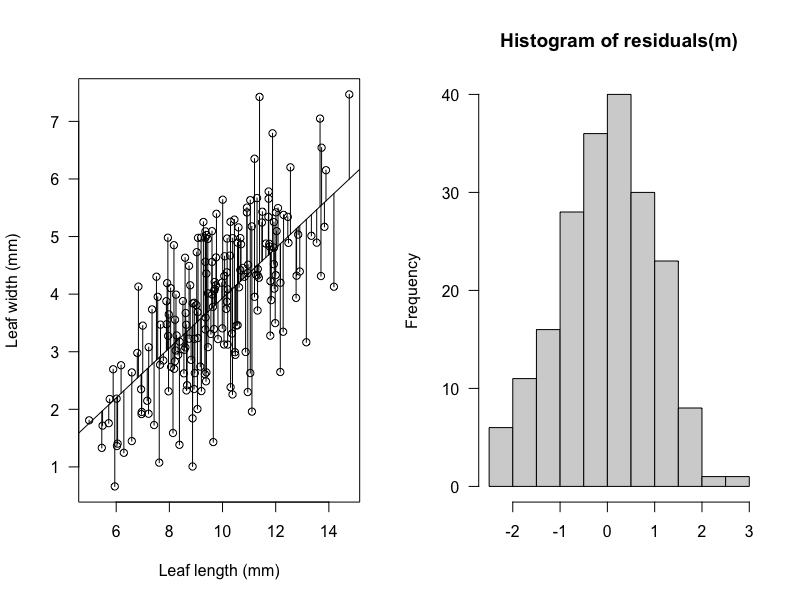

In [ ]:
# Assign the predicted output for each input to predvals using linear model
predvals <- cf[2] * x + cf[1]
par(mfrow=c(1,2))  # Whats this doing
# The plot function gives you a scatter or box depending on input
plot(x, y, las=1, xlab="Leaf length (mm)", ylab="Leaf width (mm)")
abline(m)
segments(x, y, x, predvals)
hist(residuals(m), xlab="", las=1)

Calling `abline` on the `lm` object `m` gives a continuous regression line. To limit it to the input data range, generate a sequence of input values along the data range and predict outputs using the linear model, plotting them as the regression line

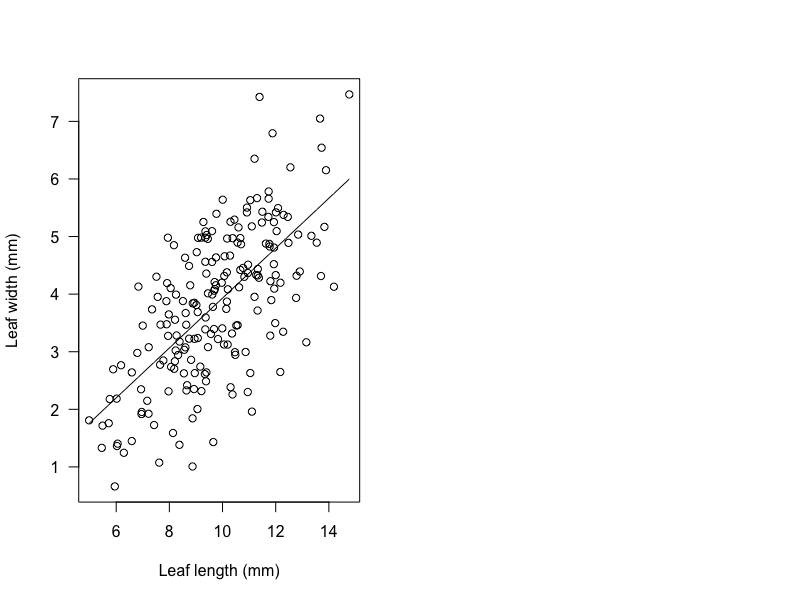

In [34]:
newx <- seq(min(x), max(x), length.out=200)
predy <- cf[2] * newx + cf[1]
plot(x, y, las=1, xlab="Leaf length (mm)", ylab="Leaf width (mm)")
lines(newx, predy)

Use `summary` to access the call and parameters generated during the call 

In [35]:
summary(m)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q 
-2.45122 -0.68319  0.02913  0.69861 
     Max 
 2.88937 

Coefficients:
            Estimate Std. Error t value
(Intercept) -0.40114    0.35186   -1.14
x            0.43330    0.03538   12.25
            Pr(>|t|)    
(Intercept)    0.256    
x             <2e-16 ***
---
Signif. codes:  
  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’
  0.1 ‘ ’ 1

Residual standard error: 0.9912 on 198 degrees of freedom
Multiple R-squared:  0.4311,	Adjusted R-squared:  0.4282 
F-statistic:   150 on 1 and 198 DF,  p-value: < 2.2e-16


The *P*-value is defined as such:

**The probability of observing the *t*-statistic if the null hypothesis is true (the slope of the linear model is 0)**

The *t*-value is inversely proportional to standard error and thus directly proportional to the sample size. **A larger sample produces a more significant *P*-value**.

In [ ]:
# The slope of the regression line is defined as follows
cov(y,x)/var(x)

[1] 0.4333027

In [ ]:
# How much the output changes for a change of one standard deviation
# in the input
(cf[2]*(mean(x) + sd(x))) - (cf[2]*mean(x))

        x 
0.8606095 

*Sidenote: if both input and output are log-transformed, the slope is interpreted as an "elasticity", or a term representing % change in output for % change in input.*

**r squared**: Pearson correlation coefficient between input and output, squared

In [ ]:
# r squared tells you how much of the variance in the output is
# explained by the input
cor(x,y)^2

[1] 0.4310643

Below is another way to calculate r squared

`variance in predicted outputs / variance in true outputs`

where

`variance in (predicted outputs) = variance in (inputs * slope)`

This makes it intuitively clear that r squared tells us how much of the change in output is explained by the model because of the following logic:

If r squared = 1, the variance in the predicted outputs is equal to the variance in the true outputs, and thus none of the variance in the true output is left to random noise. Therefore, 100% of the change in output can be explained by the change in input using the model.

In [45]:
y_hat <- cf[1] + cf[2]*x
var(y_hat)/var(y)

[1] 0.4310643

## Optional exercise

Use non-parametric bootstrapping to derive a standard error for the slope of the regression line

**Why?** We want to report the slope plus or minus the standard error

`slope = 0.43 ± 0.04 mm/mm`

In [46]:
# Create dataframe df, storing each data point
df <- data.frame(x, y)
head(df)

          x        y
1  9.971266 4.197632
2  8.872600 1.007507
3 10.375599 2.258196
4  8.136517 1.588956
5  7.898157 3.476802
6  5.885831 2.695560